# VLQcalc: a Python Module for Calculating Vector-like Quark Couplings

**Ali Can Canbay**<a href="https://orcid.org/0000-0003-4602-473X"><img src="https://orcid.org/assets/vectors/orcid.logo.icon.svg" alt="Ali Can Canbay ORCID" width="15"></a>
&
**Orhan Cakir**<a href="https://orcid.org/0000-0002-9016-138X"><img src="https://orcid.org/assets/vectors/orcid.logo.icon.svg" alt="Orhan Cakir ORCID" width="15"></a>

Ankara University Department of Physics
___

VLQcalc can be used for employing coupling parameters of vector-like quarks (VLQs) within model framework. It facilitates the conversion of couplings between different parametrization of VLQ models and computes these couplings depending on the width-to-mass ratio ($\Gamma/m$), with given branchings. By utilizing a modified version of Genetic Algorithm $^{[1]}$ (mGA) for coupling constant computations it provides parameter-dependent results. This innovative algorithm allows for swift and precise determination of correlated coupling constants with choosen branching ratios for different representations. In addition, VLQcalc can generate input cards for MadGraph5 (MG5) for event generation. The module's capability to efficiently manage the process from calculating coupling constants to prepare MG5 input card will accelerate the tasks in the new studies.

<br>

### VLQ models and their Lagrangians

* **VLQ_UFO$^{[2]}$ Lagrangian&emsp;&emsp;:** $\mathcal{L}\equiv\mathcal{L}(\kappa_{Q},\;\zeta_{i,\;L/R},\;\xi_{V},\;m_{Q})$

* **VLQ_v4_UFO$^{[3]}$ Lagrangian&nbsp; :** $\mathcal{L}\equiv\mathcal{L}(\kappa^{Q,\;i}_{V,\;L/R},\;m_{Q})$

> $\kappa$&nbsp;&nbsp;&nbsp;: coupling<br>
> $Q$&nbsp;&nbsp;: Vector-like quark<br>
> $V$&nbsp;&nbsp;: H, Z, Z<br>
> $i$&emsp;: SM family

<br>

The VLQcalc module only takes into account interactions with the 3rd family SM quarks, as their couplings are more dominant compared to other families ($i=3$).

<br>

In [1]:
# Lines required to set the directory containing VLQcalc as the default directory for Binder usage:
import sys
sys.path.append('../')

___
### VLQ object

To perform calculations related to VLQs, initially a new object of the VLQ class from the sub-module named `model` is created.

In [2]:
import VLQcalc.model as model

```python
vlq = model.VLQ( VLQ_type, FNS, LR )
```

| Parameter | Format | Values | Default Value |
|-|-|:-:|:-:|
|VLQ_type|string|X, T, B, Y|-|
|FNS|integer|4, 5|4|
|LR|bool|True, False|False|

* $m_{b}=0$ when `FNS=5`
* ```LR=False``` allows calculations with only left-handed couplings, while ```LR=True``` allows calculations with both left and right-handed couplings.

In [3]:
vlq = model.VLQ('B')
#vlq = model.VLQ('B', 5, False)

<br>

#### `setMass` method:
The mass is passed to the method as a single value or a list of values in integer or float format in GeV unit.


In [4]:
#Mass = 1000 # GeV
Mass = [1000, 1500, 2000] # A list consisting of masses, each in GeV units.
vlq.setMass(Mass)

<br>

#### `convertModel` method:
It converts the couplings in VLQ_UFO and VLQ_v4_UFO models to each other.

<br>

\begin{equation}
    \kappa_{W, L/R}^{Q}=\kappa_{Q}\sqrt{\frac{\zeta_{L/R}\xi_{W}^{Q}}{\Gamma_{W}^{0}}} \qquad\qquad
    \kappa_{Z, L/R}^{Q}=\kappa_{Q}\sqrt{\frac{\zeta_{L/R}\xi_{Z}^{Q}}{\Gamma_{Z}^{0}}} \qquad\qquad
    \kappa_{H, L/R}^{Q}=\kappa_{Q}\frac{m_{Q}}{v}\sqrt{\frac{\zeta_{L/R}\xi_{H}^{Q}}{\Gamma_{H}^{0}}}
\end{equation}

$$\Gamma_{V}^{0}\equiv\Gamma_{V}^{0}(m_{Q},\;m_{V},\;m_{q})$$

<br>

> **$q$** : 3rd family SM quark

<br>

```python
vlq.convertModel( Kappas, BRs, reverse )
```

| Parameter | Format | Values | Default Value |
|-|-|:-:|:-:|
|Kappas|float/integer or list|any|-|
|BRs|float/integer or list|any|1|
|reverse|bool|True, False|False|

* `Kappas` is
    * $\kappa_Q$ where Q is X, T, B or Y for converting couplings from VLQ_UFO to VLQ_v4_UFO.
    * given in the list as $[\kappa_H, \kappa_W, \kappa_Z]$ for T and B, while it is only $\kappa_W$ for X and Y when converting couplings from VLQ_v4_UFO to VLQ_UFO.
* For T and B, the parameter named `BRs` is given in the list as [BR(Q→Hq), BR(Q→Wq), BR(Q→Zq)] where q represents the 3rd family quarks of the Standard Model. Only BR(Q→Wq) is specified for X and Y.
* When the `reverse` value is `False`, the conversion is from VLQ_UFO to VLQ_v4_UFO; when `True`, it is from VLQ_v4_UFO to VLQ_UFO.

In [5]:
branchings = [0.25,0.5,0.25] # [BR(Hq),BR(Wq),BR(Zq)]
kB = 0.5
vlq.convertModel(kB, branchings)  # converts kappa from VLQ_UFO to VLQ_v4_UFO

print('\nVLQ_v4_UFO:')
print('mB [GeV]\tkH\tkW\tkZ')
for i in range(len(Mass)):
    M = Mass[i]
    kH = round(vlq.KappaH[i], 2)
    kW = round(vlq.KappaW[i], 2)
    kZ = round(vlq.KappaZ[i], 2)
    print(f'  {M}\t\t{kH}\t{kW}\t{kZ}')


VLQ_v4_UFO:
mB [GeV]	kH	kW	kZ
  1000		1.45	0.35	0.35
  1500		2.16	0.35	0.35
  2000		2.87	0.35	0.35


In [6]:
newKappas = [vlq.KappaH, vlq.KappaW, vlq.KappaZ]
vlq.convertModel(newKappas, branchings, True)  # converts kappas from VLQ_v4_UFO to VLQ_UFO

print('VLQ_UFO:')
print('mB [GeV]\tkB')
for i in range(len(Mass)):
    M = Mass[i]
    kB = round(vlq.KappaOld[i], 2)
    print(f'  {M}\t\t{kB}')


Warning !
Deleting old kappa values for kB

VLQ_UFO:
mB [GeV]	kB
  1000		0.5
  1500		0.5
  2000		0.5


In [7]:
# For Y quark
Mass = [1000, 1500, 2000]
vlq = model.VLQ('Y', FNS=5, LR=True)
vlq.setMass(Mass)

kY = 0.5
vlq.convertModel(kY)  # converts kappa from VLQ_UFO to VLQ_v4_UFO

print('\nVLQ_v4_UFO:')
print('mY [GeV]\tkW')
for i in range(len(Mass)):
    M = Mass[i]
    kW = round(vlq.KappaW[i], 2)
    print(f'{M}\t\t{kW}')

newKappas = vlq.KappaW
vlq.convertModel(newKappas, reverse=True)  # converts kappas from VLQ_v4_UFO to VLQ_UFO

print('VLQ_UFO:')
print('mY [GeV]\tkY')
for i in range(len(Mass)):
    M = Mass[i]
    kY = round(vlq.KappaOld[i], 2)
    print(f'{M}\t\t{kY}')


VLQ_v4_UFO:
mY [GeV]	kW
1000		0.5
1500		0.5
2000		0.5

Warning !
Deleting old kappa values for kY

VLQ_UFO:
mY [GeV]	kY
1000		0.5
1500		0.5
2000		0.5


<br>

#### `calcDecay` method:
*It only works with the **VLQ_v4_UFO** model. Converted couplings can be used for VLQ_UFO model.*
<br><br>

For T and B:
```python
decayH, decayW, decayZ, Gamma = vlq.calcDecay( Mass, Kappas, LR )
```
For X and Y:
```python
decayW = vlq.calcDecay( Mass, Kappa, LR )
```

| Parameter | Format | Values | Default Value |
|-|-|:-:|:-:|
|Mass|float/integer or list|any|-|
|Kappas|list|any|-|
|Kappa|float/integer|any|-|
|LR|bool|True, False|False|

<br>

In [8]:
vlq = model.VLQ('T')
kappas = [1.612, 0.384, 0.402]

print('\nmT [GeV]\tGamma [GeV]\tBR(Ht)\tBR(Wb)\tBR(Zt)')
for mass in range(1000,2001,200):
    decayH, decayW, decayZ, Gamma = vlq.calcDecay(mass, kappas)
    BRH = round(decayH/Gamma, 3)
    BRW = round(decayW/Gamma, 3)
    BRZ = round(decayZ/Gamma, 3)
    Gamma = round(Gamma, 3)
    print(f'{mass}\t\t{Gamma}\t\t{BRH}\t{BRW}\t{BRZ}')


mT [GeV]	Gamma [GeV]	BR(Ht)	BR(Wb)	BR(Zt)
1000		100.011		0.25	0.5	0.25
1200		161.189		0.188	0.536	0.276
1400		244.618		0.146	0.561	0.294
1600		354.031		0.115	0.579	0.306
1800		493.154		0.093	0.591	0.315
2000		665.709		0.077	0.601	0.322


<br><br>

**VLQ_UFO** couplings can also be obtained after model conversion. 

In [9]:
Mass = range(1000, 2001, 200)
branchings = [0.25, 0.5, 0.25] # [BR(Hb), BR(Wt), BR(Zb)]
vlq = model.VLQ('T')
vlq.setMass( Mass )

kT = 0.5
vlq.convertModel(kT, branchings)  # converts kappa from VLQ_UFO to VLQ_v4_UFO

kappas = []
for i in range(len(Mass)):
    kappas.append( [vlq.KappaH[i], vlq.KappaW[i], vlq.KappaZ[i]] )

print('\nmT [GeV]\tGamma [GeV]\tBR(Ht)\tBR(Wb)\tBR(Zt)')
for i in range(len(Mass)):
    decayH, decayW, decayZ, Gamma = vlq.calcDecay(Mass[i], kappas[i])
    BRH = round(decayH/Gamma, 3)
    BRW = round(decayW/Gamma, 3)
    BRZ = round(decayZ/Gamma, 3)
    Gamma = round(Gamma, 3)
    print(f'{Mass[i]}\t\t{Gamma}\t\t{BRH}\t{BRW}\t{BRZ}')


mT [GeV]	Gamma [GeV]	BR(Ht)	BR(Wb)	BR(Zt)
1000		82.032		0.247	0.517	0.236
1200		142.742		0.246	0.513	0.241
1400		227.621		0.245	0.511	0.244
1600		340.697		0.244	0.51	0.246
1800		485.999		0.244	0.509	0.247
2000		667.553		0.244	0.508	0.248


<br><br>

#### `calcRatioKappas` method:
It is used to calculate the couplings according to the $\Gamma_Q/m_Q$ ratio.<br>
*It only works with the **VLQ_v4_UFO** model. Couplings can be converted to VLQ_UFO model after calculations are made according to this model.*

**mGA** $^{[1]}$ is used to calculate couplings according to the $\Gamma_Q/m_Q$ ratio.


```python
vlq.calcRatioKappas( BRs, Ratio )
```

* Ratio is $\Gamma_Q/m_Q$ value.

In [10]:
Mass = range(1000, 2001, 200)
branchings = [0.25, 0.5, 0.25] # [BR(Hb), BR(Wt), BR(Zb)]
GM = 0.1 # Gamma/Mass ratio

vlq = model.VLQ('T')
vlq.setMass(Mass)
vlq.calcRatioKappas(branchings, GM)

print('\nmT [GeV]\tkH\tkW\tkZ')
for i in range(len(Mass)):
    M = Mass[i]
    kH = round(vlq.KappaH[i], 3)
    kW = round(vlq.KappaW[i], 3)
    kZ = round(vlq.KappaZ[i], 3)
    print(f'{M}\t\t{kH}\t{kW}\t{kZ}')


mT [GeV]	kH	kW	kZ
1000		1.612	0.384	0.402
1200		1.603	0.32	0.33
1400		1.598	0.274	0.281
1600		1.595	0.24	0.244
1800		1.593	0.213	0.216
2000		1.592	0.192	0.194


In [11]:
print('\nmT [GeV]\tGamma [GeV]\tBR(Hb)\tBR(Wt)\tBR(Zb)')
for i in range(len(Mass)):
    kappas = [vlq.KappaH[i], vlq.KappaW[i], vlq.KappaZ[i]]
    decayH, decayW, decayZ, Gamma = vlq.calcDecay( Mass[i], kappas )
    BRH = round(decayH/Gamma, 2)
    BRW = round(decayW/Gamma, 2)
    BRZ = round(decayZ/Gamma, 2)
    Gamma = round(Gamma, 2)
    print(f'{Mass[i]}\t\t{Gamma}\t\t{BRH}\t{BRW}\t{BRZ}')
    


mT [GeV]	Gamma [GeV]	BR(Hb)	BR(Wt)	BR(Zb)
1000		100.0		0.25	0.5	0.25
1200		120.0		0.25	0.5	0.25
1400		140.0		0.25	0.5	0.25
1600		160.0		0.25	0.5	0.25
1800		180.0		0.25	0.5	0.25
2000		200.0		0.25	0.5	0.25


<br><br>

**VLQ_UFO** couplings can also be obtained after model conversion. 

In [12]:
Mass = range(1000, 2001, 200)
branchings = [0.25, 0.5, 0.25] # [BR(Hb), BR(Wt), BR(Zb)]
GM = 0.1 # Gamma/Mass ratio

vlq = model.VLQ('T')
vlq.setMass(Mass)
vlq.calcRatioKappas(branchings, GM)

newKappas = [vlq.KappaH, vlq.KappaW, vlq.KappaZ]
vlq.convertModel(newKappas, branchings, reverse=True)  # converts kappas VLQ_v4_UFO to VLQ_UFO

print('mB [GeV]\tkB')
for i in range(len(Mass)):
    M = Mass[i]
    kB = round(vlq.KappaOld[i], 2)
    print(f'{M}\t\t{kB}')
print()

mB [GeV]	kB
1000		0.56
1200		0.46
1400		0.39
1600		0.34
1800		0.31
2000		0.27



<br>

### MG5 object

To generate a MadGraph5$^{[4]}$ input card, it is necessary to first create an `mg5` object from the `madgraph` sub-module.

In [13]:
import VLQcalc.madgraph as madgraph

```python
mg5 = madgraph.MG5(VLQ_object, model)
```
* `model` parameter can be VLQ_UFO or VLQ_v4_UFO in string format.

In [14]:
mg5 = madgraph.MG5(vlq, 'VLQ_v4_UFO')

<br>

In the MG5 object, there are two different methods for entering a process: `setProcess` and `addProcess` methods, which take their parameters as strings, are used respectively to define the main process and additional processes.

```python
mg5.setProcess( process )
mg5.addProcess( process )
```


MG5 object also have the properties in string format listed in the below:


| Property | Values | Default Value |
|-|-|:-:|
|shower|OFF, pythia8, ...|OFF|
|detector|OFF, Delphes, ...|OFF|
|analysis|OFF, ExRoot, MadAnalysis, ...|OFF|
|madspin|OFF, ON, onshell, full|OFF|
|reweight|OFF, ON|OFF|


<br>

`addInput` method, which takes a string parameter, is used to define inputs that allow modifications to be made on simulation cards. After all definitions have been made, an MG5 input card can be generated using the `createMG5Input` method, which takes the output file name (in string format) as a parameter.
```python
mg5.addInput( input )
mg5.createMG5Input( file_name )
```

<br>

When creating an input card, the processes defined in `setProcess` and `addProcess` are expanded to include both particles and antiparticles. For example, when we consider $p\ p \rightarrow W^{+}\ e^{-} \bar{v}_{e}$ process, the expanded definition to be written in the input card will be as follows:

    define WW = w+ w-
    define ee = e+ e-
    define veve = ve ve~
    generate p p > WW ee veve

This ensures the most accurate event production statistically.

In [15]:
mg5 = madgraph.MG5(vlq,'VLQ_v4_UFO')

mg5.setProcess('p p > bp j, (bp > w- t, t > w+ b)')
mg5.addProcess('p p > bp j b, (bp > w- t, t > w+ b)')

mg5.shower = 'Pythia8'
mg5.detector = 'Delphes'

mg5.addInput('Nevents 1000') # inputs for cards

mg5.createMG5Input('mg5_input_card') # name of input file


mg5_input_card.dat is created!




---

## Saving couplings

In [16]:
vlq = model.VLQ('B')
vlq.setMass( range(1000, 2001, 100) )
vlq.calcRatioKappas([0.25, 0.5, 0.25], 0.1)

output_file = open('kappa_results.txt', 'w')
output_file.writelines( [f'VLQ type: B\n',
                         f'Branchings:\n',
                         f'  BR(Hb)={vlq.BRs[0]}\n',
                         f'  BR(Wt)={vlq.BRs[1]}\n',
                         f'  BR(Zb)={vlq.BRs[2]}\n',
                         '_____________\n\n'])

for i in range(len(vlq.Mass)):
    output_file.writelines( [f'{vlq.Mass[i]} GeV\n',
                             f'\tkH = {round(vlq.KappaH[i], 4)}\n',
                             f'\tkW = {round(vlq.KappaW[i], 4)}\n',
                             f'\tkZ = {round(vlq.KappaZ[i], 4)}\n\n'])
output_file.close()


---

## Plotting couplings

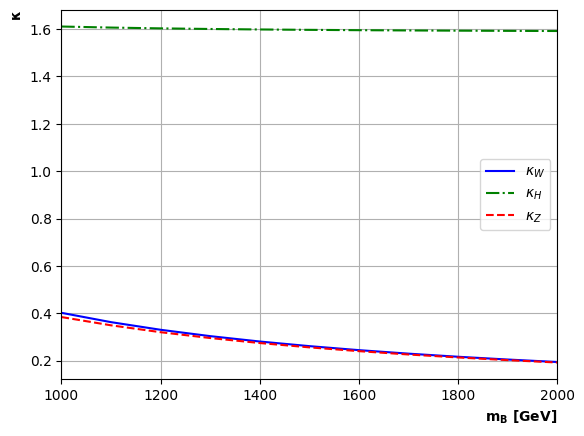

In [17]:
import matplotlib.pyplot as plt

vlq = model.VLQ('B')
vlq.setMass( range(1000, 2001, 100) )
vlq.calcRatioKappas([0.25, 0.5, 0.25], 0.1)

plt.plot(vlq.Mass, vlq.KappaW, '-b', label='$\kappa_{W}$')
plt.plot(vlq.Mass, vlq.KappaH, '-.g', label='$\kappa_{H}$')
plt.plot(vlq.Mass, vlq.KappaZ, '--r', label='$\kappa_{Z}$')
plt.legend()
plt.xlabel('$\mathbf{m_{B}}$ [GeV]', horizontalalignment='right', x=1.0, weight='bold')
plt.ylabel('$\mathbf{\kappa}$', horizontalalignment='right', y=1.0, weight='bold')
plt.xlim([min(vlq.Mass),max(vlq.Mass)])
plt.grid()
# plt.savefig('kappa_plot.png',dpi=720)
plt.show()

<br>

___

### References

1. Canbay, A. C. modifiedGA (Version 0.1.0) [Computer software]. [DOI: 10.5281/zenodo.12569505](https://doi.org/10.5281/zenodo.12569505), [GitHub: acanbay/modifiedGA](https://github.com/acanbay/modifiedGA)
2. M. Buchkremer, G. Cacciapaglia, A. Deandrea, and L. Panizzi. Model-independent framework for searches of top partners. *Nuclear Physics B*, 876(2):376–417, 2013.
3. B. Fuks and H. S. Shao. QCD next-to-leading-order predictions matched to parton showers for vector-like quark models. *The European Physical Journal C*, 77(2):1–21, 2017.
4. J. Alwall, M. Herquet, F. Maltoni, O. Mattelaer, and T. Stelzer. Madgraph 5: going beyond. *Journal of High Energy Physics*, 2011(6):1–40, 2011.